# Results plotter

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# Take table from "./predictions" dir

folder_path = "./predictions"

In [72]:
pattern = "val_results_full"

results_acc_val = {}
results_f1_val = {}

for filename in os.listdir(folder_path):
    if filename.endswith(f"{pattern}.csv"):

        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # iterate columns and create box plot for each metric
        for column_name, column_content in df.items():
            if "Random" in column_name or "Majority" in column_name:
                continue
            if "F1" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_f1_val[column_name[:-3]] = list(column_content)[-2]
            elif "Accuracy" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_acc_val[column_name[:-9]] = list(column_content)[-2]

# replace spaces with '\n' in the keys of the dictionary
results_f1_val = {key.replace(' ', '\n'): value for key, value in results_f1_val.items()}
results_acc_val = {key.replace(' ', '\n'): value for key, value in results_acc_val.items()}



pattern = "test_results_full"

results_acc_test = {}
results_f1_test = {}

for filename in os.listdir(folder_path):
    if filename.endswith(f"{pattern}.csv"):

        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # iterate columns and create box plot for each metric
        for column_name, column_content in df.items():
            if "Random" in column_name or "Majority" in column_name:
                continue
            if "F1" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_f1_test[column_name[:-3]] = mu
            elif "Accuracy" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_acc_test[column_name[:-9]] = mu

# replace spaces with '\n' in the keys of the dictionary
results_f1_test = {key.replace(' ', '\n'): value for key, value in results_f1_test.items()}
results_acc_test = {key.replace(' ', '\n'): value for key, value in results_acc_test.items()}


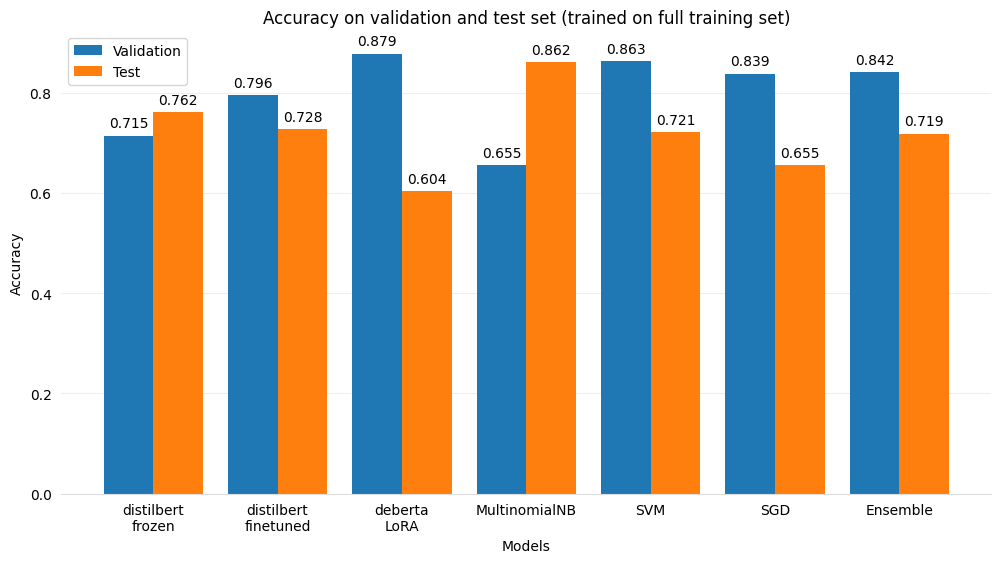

In [73]:
names = list(results_acc_test.keys())
means = {
    "Validation": list(results_acc_val.values()),
    "Test": list(results_acc_test.values())
}

X_axis = np.arange(len(names))

plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, means["Validation"], 0.4, label = 'Validation')
plt.bar(X_axis + 0.2, means["Test"], 0.4, label = 'Test')

for attr, measur in results_acc_val.items():
    plt.text(X_axis[names.index(attr)] - 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

for attr, measur in results_acc_test.items():
    plt.text(X_axis[names.index(attr)] + 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

ax = plt.gca()

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.xticks(X_axis, names)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy on validation and test set (trained on full training set)")
plt.legend()

plt.savefig("barplot_acc_full.png")

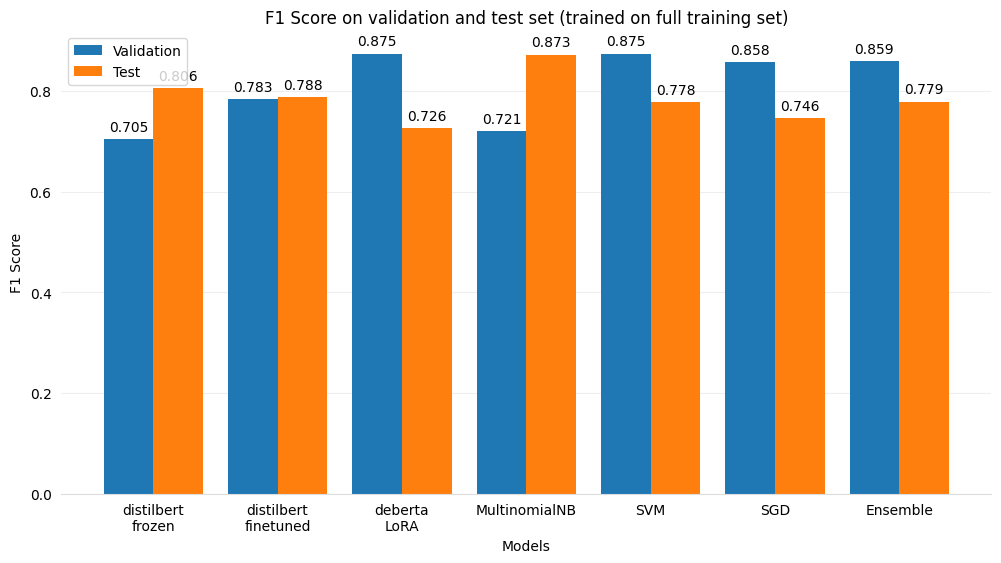

In [74]:
names = list(results_f1_test.keys())
means = {
    "Validation": list(results_f1_val.values()),
    "Test": list(results_f1_test.values())
}

X_axis = np.arange(len(names))

plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, means["Validation"], 0.4, label = 'Validation')
plt.bar(X_axis + 0.2, means["Test"], 0.4, label = 'Test')

for attr, measur in results_f1_val.items():
    plt.text(X_axis[names.index(attr)] - 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

for attr, measur in results_f1_test.items():
    plt.text(X_axis[names.index(attr)] + 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

ax = plt.gca()

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.xticks(X_axis, names)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score on validation and test set (trained on full training set)")
plt.legend()

plt.savefig("barplot_f1_full.png")

In [75]:
pattern = "val_results_subset"

results_acc_val = {}
results_f1_val = {}

for filename in os.listdir(folder_path):
    if filename.endswith(f"{pattern}.csv"):

        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # iterate columns and create box plot for each metric
        for column_name, column_content in df.items():
            if "Random" in column_name or "Majority" in column_name:
                continue
            if "F1" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_f1_val[column_name[:-3]] = list(column_content)[-2]
            elif "Accuracy" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_acc_val[column_name[:-9]] = list(column_content)[-2]

# replace spaces with '\n' in the keys of the dictionary
results_f1_val = {key.replace(' ', '\n'): value for key, value in results_f1_val.items()}
results_acc_val = {key.replace(' ', '\n'): value for key, value in results_acc_val.items()}



pattern = "test_results_subset"

results_acc_test = {}
results_f1_test = {}

for filename in os.listdir(folder_path):
    if filename.endswith(f"{pattern}.csv"):

        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)

        # iterate columns and create box plot for each metric
        for column_name, column_content in df.items():
            if "Random" in column_name or "Majority" in column_name:
                continue
            if "F1" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_f1_test[column_name[:-3]] = mu
            elif "Accuracy" in column_name:
                mu = list(column_content)[-2]
                if not math.isnan(mu) and mu > 0.01:
                    results_acc_test[column_name[:-9]] = mu

# replace spaces with '\n' in the keys of the dictionary
results_f1_test = {key.replace(' ', '\n'): value for key, value in results_f1_test.items()}
results_acc_test = {key.replace(' ', '\n'): value for key, value in results_acc_test.items()}


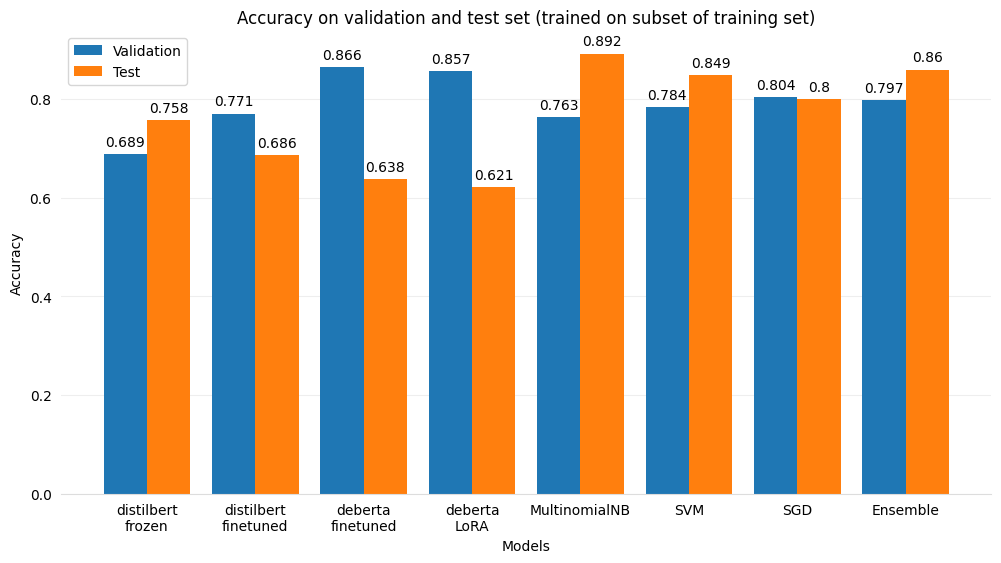

In [76]:
names = list(results_acc_test.keys())
means = {
    "Validation": list(results_acc_val.values()),
    "Test": list(results_acc_test.values())
}

X_axis = np.arange(len(names))

plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, means["Validation"], 0.4, label = 'Validation')
plt.bar(X_axis + 0.2, means["Test"], 0.4, label = 'Test')

for attr, measur in results_acc_val.items():
    plt.text(X_axis[names.index(attr)] - 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

for attr, measur in results_acc_test.items():
    plt.text(X_axis[names.index(attr)] + 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

ax = plt.gca()

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.xticks(X_axis, names)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy on validation and test set (trained on subset of training set)")
plt.legend()

plt.savefig("barplot_acc_subset.png")

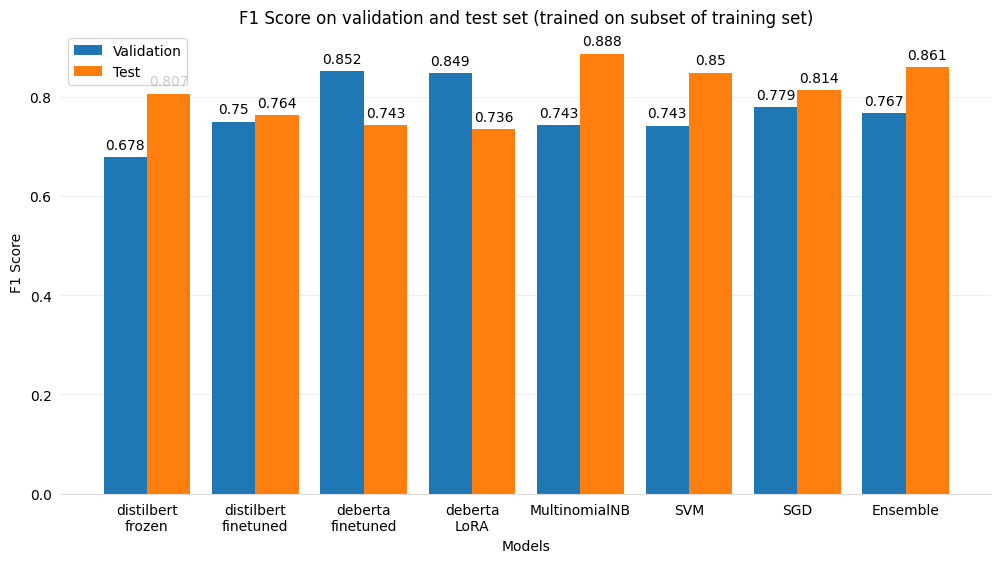

In [77]:
names = list(results_f1_test.keys())
means = {
    "Validation": list(results_f1_val.values()),
    "Test": list(results_f1_test.values())
}

X_axis = np.arange(len(names))

plt.figure(figsize=(12, 6))
plt.bar(X_axis - 0.2, means["Validation"], 0.4, label = 'Validation')
plt.bar(X_axis + 0.2, means["Test"], 0.4, label = 'Test')

for attr, measur in results_f1_val.items():
    plt.text(X_axis[names.index(attr)] - 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

for attr, measur in results_f1_test.items():
    plt.text(X_axis[names.index(attr)] + 0.2, measur + 0.01, round(measur, 3), ha='center', va='bottom')

ax = plt.gca()

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.xticks(X_axis, names)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score on validation and test set (trained on subset of training set)")
plt.legend()

plt.savefig("barplot_f1_subset.png")